In [3]:
# Import the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [4]:
# Importing dataset

df = pd.read_csv("../MM_PFDACA2/Dataset_InPrevi.csv")

In [5]:
df.head()

,Fecha,Dia_sem,Dia,Mes,Año,Cuenta_id,Campaña_id,Grupo_id,Anuncio_id,Dispositivo_revenue,...,Conversiones_f,Conversiones_revenue,Conv_diff_i,Conv_diff_f,Conv_diff_i_%,Conv_diff_f _%,Vistas_video_i,Vistas_video_f,TQ_TypeTag,TQ_SourceTag
0,28/01/2022,viernes,28,1,2022,5712012562,14527003152,128117278778,543739399842,Desktop,...,24,70,45,46.0,280%,292%,67,59,8.0,3.5
1,14/12/2021,martes,14,12,2021,6853339709,15163427910,130636123818,558922835962,Desktop,...,3,36,28,33.0,450%,1200%,37,18,0.0,2.5
2,15/02/2022,martes,15,2,2022,1522870444,15307650694,127793322937,562771755980,Desktop,...,68,237,161,169.0,312%,349%,202,157,3.0,2.5
3,23/01/2022,domingo,23,1,2022,2137965400,15346107977,129625464906,563540780823,Desktop,...,10,14,2,4.0,117%,140%,46,34,2.0,2.0
4,15/02/2022,martes,15,2,2022,1522870444,15307650685,127793322697,562705083583,Desktop,...,102,202,95,100.0,189%,198%,231,195,3.5,2.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237409 entries, 0 to 237408
Data columns (total 51 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Fecha                 237409 non-null  object 
 1   Dia_sem               237409 non-null  object 
 2   Dia                   237409 non-null  int64  
 3   Mes                   237409 non-null  int64  
 4   Año                   237409 non-null  int64  
 5   Cuenta_id             237409 non-null  int64  
 6   Campaña_id            237409 non-null  int64  
 7   Grupo_id              237409 non-null  int64  
 8   Anuncio_id            237409 non-null  int64  
 9   Dispositivo_revenue   237409 non-null  object 
 10  Source_tag_numero     237409 non-null  int64  
 11  Pais                  237409 non-null  object 
 12  Pais_revenue          237409 non-null  object 
 13  Categoria             237409 non-null  object 
 14  Keyword               237409 non-null  object 
 15  

In [7]:
df.describe()

,Dia,Mes,Año,Cuenta_id,Campaña_id,Grupo_id,Anuncio_id,Source_tag_numero,Coste_i,Coste_f,...,Clicks_revenue,Conversiones_i,Conversiones_f,Conversiones_revenue,Conv_diff_i,Conv_diff_f,Vistas_video_i,Vistas_video_f,TQ_TypeTag,TQ_SourceTag
count,237409.000000,237409.000000,237409.000000,2.374090e+05,2.374090e+05,2.374090e+05,2.374090e+05,237409.000000,237409.000000,237409.000000,...,237409.000000,237409.000000,237409.000000,237409.000000,237409.000000,237409.000000,237409.000000,237409.000000,237409.000000,231148.000000
mean,14.918348,3.717466,2021.812909,5.870377e+09,1.534134e+10,1.309973e+11,5.634240e+11,1.172053,5.673899,4.467605,...,8.304024,4.503047,3.563357,5.224170,0.721123,1.660813,26.993033,22.040609,1.200805,2.177363
std,8.802648,4.034820,0.389985,2.841046e+09,4.823720e+08,3.503509e+09,1.163915e+10,0.377428,6.475413,5.395849,...,14.402907,6.259797,5.384216,9.809047,9.264214,9.277796,49.851780,47.243441,1.980433,0.727969
min,1.000000,1.000000,2021.000000,1.238797e+09,1.426062e+10,1.209683e+11,5.392667e+11,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-120.000000,-102.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,2022.000000,2.137965e+09,1.502069e+10,1.289304e+11,5.548408e+11,1.000000,1.910700,1.400296,...,1.000000,1.000000,0.000000,0.000000,-3.000000,-2.000000,7.000000,5.000000,0.000000,2.000000
50%,14.000000,2.000000,2022.000000,5.926673e+09,1.530344e+10,1.308208e+11,5.627718e+11,1.000000,3.637900,2.808154,...,3.000000,3.000000,2.000000,1.000000,0.000000,0.000000,14.000000,10.000000,0.000000,2.000000
75%,23.000000,3.000000,2022.000000,8.039128e+09,1.569323e+10,1.324971e+11,5.744881e+11,1.000000,7.122400,5.501542,...,9.000000,6.000000,5.000000,6.000000,3.000000,4.000000,29.000000,23.000000,1.500000,2.500000
max,31.000000,12.000000,2022.000000,9.479349e+09,1.647151e+10,1.422775e+11,5.857490e+11,2.000000,100.000000,94.273730,...,448.000000,123.000000,102.000000,237.000000,161.000000,169.000000,3115.000000,3077.000000,10.000000,4.500000


In [8]:
# Counting records in each category

df.count()

Fecha                   237409
Dia_sem                 237409
Dia                     237409
Mes                     237409
Año                     237409
Cuenta_id               237409
Campaña_id              237409
Grupo_id                237409
Anuncio_id              237409
Dispositivo_revenue     237409
Source_tag_numero       237409
Pais                    237409
Pais_revenue            237409
Categoria               237409
Keyword                 237409
Coste_i                 237409
Coste_f                 237409
Cost_diff               237409
Revenue                 237409
Profit_i                237409
Profit_f                237409
ROAS_i                  237409
ROAS_f                  237409
CPC_i                   237409
CPC_f                   237409
RPC                     237409
CPA_JOT_i               237409
CPA_JOT_f               237409
CPA_G_i                 237409
CPA_G_f                 237409
CR_JOT_i                237409
CR_JOT_f                237409
CR_G_i  

In [10]:
# Identifying null values

df.isnull().sum()

Fecha                      0
Dia_sem                    0
Dia                        0
Mes                        0
Año                        0
Cuenta_id                  0
Campaña_id                 0
Grupo_id                   0
Anuncio_id                 0
Dispositivo_revenue        0
Source_tag_numero          0
Pais                       0
Pais_revenue               0
Categoria                  0
Keyword                    0
Coste_i                    0
Coste_f                    0
Cost_diff                  0
Revenue                    0
Profit_i                   0
Profit_f                   0
ROAS_i                     0
ROAS_f                     0
CPC_i                      0
CPC_f                      0
RPC                        0
CPA_JOT_i                  0
CPA_JOT_f                  0
CPA_G_i                    0
CPA_G_f                    0
CR_JOT_i                   0
CR_JOT_f                   0
CR_G_i                     0
CR_G_f                     0
Impresiones_i 

## Data Preparation

In [11]:
# Removal of TQ_SourceTag column as it is not relevant for the analysis.

df = df.drop(columns=['TQ_SourceTag'])

In [12]:
# Modification of the date type from object to datetime

df["Fecha"] = pd.to_datetime(df["Fecha"], format="%d/%m/%Y", errors="coerce")
df["Fecha"].dtype
df["Fecha"].head()

0   2022-01-28
1   2021-12-14
2   2022-02-15
3   2022-01-23
4   2022-02-15
Name: Fecha, dtype: datetime64[ns]

In [13]:
# Checking null value generation

df[df["Fecha"].isnull()]

,Fecha,Dia_sem,Dia,Mes,Año,Cuenta_id,Campaña_id,Grupo_id,Anuncio_id,Dispositivo_revenue,...,Conversiones_i,Conversiones_f,Conversiones_revenue,Conv_diff_i,Conv_diff_f,Conv_diff_i_%,Conv_diff_f _%,Vistas_video_i,Vistas_video_f,TQ_TypeTag


In [14]:
# Numerical variables: Conversion of object (percentage) variables to float variables

object_to_numeric = ['Cost_diff', 'ROAS_i', 'ROAS_f', 'CR_JOT_i', 'CR_JOT_f', 
                      'CR_G_i', 'CR_G_f', 'Conv_diff_i_%', 'Conv_diff_f _%']

for temp in object_to_numeric:
    df[temp] = df[temp].str.replace('%', '').astype(float) / 100

In [15]:
# Categorical Variables: Conversion of numeric variables to objects

numeric_to_object = ["Cuenta_id","Campaña_id","Grupo_id","Source_tag_numero","Anuncio_id"]

for temp in numeric_to_object:
    df[temp] = df[temp].astype("object")

In [16]:
# Grouping of variables according to their category


# Filtering categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

df_categorical = df[categorical_columns]

df_categorical.head()

,Dia_sem,Cuenta_id,Campaña_id,Grupo_id,Anuncio_id,Dispositivo_revenue,Source_tag_numero,Pais,Pais_revenue,Categoria,Keyword
0,viernes,5712012562,14527003152,128117278778,543739399842,Desktop,1,USA,USA,RPC6,support ticket systems
1,martes,6853339709,15163427910,130636123818,558922835962,Desktop,2,USA,USA,AccountingSofware,lease accounting software for small business
2,martes,1522870444,15307650694,127793322937,562771755980,Desktop,1,USA,USA,BlackFriday,help desk software
3,domingo,2137965400,15346107977,129625464906,563540780823,Desktop,1,CAN,CAN,HostedDataStorage,cloud contact center
4,martes,1522870444,15307650685,127793322697,562705083583,Desktop,1,USA,USA,RPC4,landscape business insurance


In [17]:
# Filtering numerical columns

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

df_numeric = df[numeric_columns]

df_numeric.head()

,Dia,Mes,Año,Coste_i,Coste_f,Cost_diff,Revenue,Profit_i,Profit_f,ROAS_i,...,Conversiones_i,Conversiones_f,Conversiones_revenue,Conv_diff_i,Conv_diff_f,Conv_diff_i_%,Conv_diff_f _%,Vistas_video_i,Vistas_video_f,TQ_TypeTag
0,28,1,2022,27.1295,25.018902,0.08,100.000000,98.990825,100.0806,0.00,...,25,24,70,45,46.0,2.80,2.92,67,59,8.0
1,14,12,2021,12.9000,11.147397,0.14,94.390741,100.000000,100.9050,15.01,...,8,3,36,28,33.0,4.50,12.00,37,18,0.0
2,15,2,2022,67.0180,58.412511,0.13,92.362105,69.763024,74.2066,0.00,...,76,68,237,161,169.0,3.12,3.49,202,157,3.0
3,23,1,2022,8.6049,6.642364,0.23,88.930408,96.047655,97.0611,0.00,...,12,10,14,2,4.0,1.17,1.40,46,34,2.0
4,15,2,2022,100.0000,94.273730,0.06,88.518370,48.388891,51.3457,0.00,...,107,102,202,95,100.0,1.89,1.98,231,195,3.5


## Data inconsistency

In [18]:
# Creating the ROAS_calculated column as float type
df['ROAS_calculated'] = 0.0 

# Calculating ROAS for rows where Cost_f is not 0 (allowing negative ROAS)
df.loc[df['Coste_f'] != 0, 'ROAS_calculated'] = (df['Revenue'] / df['Coste_f'])

# Checking the first values to make sure they were calculated correctly
df[['Campaña_id', 'Coste_f', 'Revenue', 'ROAS_calculated']].head()

,Campaña_id,Coste_f,Revenue,ROAS_calculated
0,14527003152,25.018902,100.000000,3.996978
1,15163427910,11.147397,94.390741,8.467514
2,15307650694,58.412511,92.362105,1.581204
3,15346107977,6.642364,88.930408,13.388367
4,15307650685,94.273730,88.518370,0.938951


* *ROAS has been calculated as a ratio, i.e. for every euro invested ‘X’ is earned, i.e. ROAS has not been calculated as a percentage.*

In [21]:
# Cheking null values
df["ROAS_calculated"].isnull().sum()

0

In [22]:
# Filtering List of columns relevant to the analysis
columns_to_keep = [
    'Fecha', 'Dia','Dia_sem','Mes', 'Cuenta_id', 'Campaña_id', 'Grupo_id', 'Anuncio_id',
    'Dispositivo_revenue', 'Categoria', 'Keyword','Impresiones_f',
    'Coste_f', 'Revenue', 'Profit_f','CPC_f', 'RPC',
    'Conversiones_f', 'Clicks_f', 'CR_G_f','ROAS_calculated'
]

# Filtering the DataFrame with the relevant columns
df_filtered = df[columns_to_keep]

df_filtered.head()

,Fecha,Dia,Dia_sem,Mes,Cuenta_id,Campaña_id,Grupo_id,Anuncio_id,Dispositivo_revenue,Categoria,...,Impresiones_f,Coste_f,Revenue,Profit_f,CPC_f,RPC,Conversiones_f,Clicks_f,CR_G_f,ROAS_calculated
0,2022-01-28,28,viernes,1,5712012562,14527003152,128117278778,543739399842,Desktop,RPC6,...,67,25.018902,100.000000,100.0806,0.543758,5.979186,24,46,0.52,3.996978
1,2021-12-14,14,martes,12,6853339709,15163427910,130636123818,558922835962,Desktop,AccountingSofware,...,32,11.147397,94.390741,100.9050,0.174757,10.974052,3,14,0.21,8.467514
2,2022-02-15,15,martes,2,1522870444,15307650694,127793322937,562771755980,Desktop,BlackFriday,...,190,58.412511,92.362105,74.2066,0.475399,1.631119,68,114,0.60,1.581204
3,2022-01-23,23,domingo,1,2137965400,15346107977,129625464906,563540780823,Desktop,HostedDataStorage,...,78,6.642364,88.930408,97.0611,0.508162,26.586573,10,13,0.77,13.388367
4,2022-02-15,15,martes,2,1522870444,15307650685,127793322697,562705083583,Desktop,RPC4,...,226,94.273730,88.518370,51.3457,0.862709,1.834096,102,156,0.65,0.938951


# Analysis

### Insight 1: Which days of the week generate the highest ROAS and are statistically different?

In [23]:
# Grouping by Dia_sem and calculating the average ROAS_calculated
roas_by_day = df.groupby('Dia_sem')['ROAS_calculated'].mean().reset_index()
roas_by_day

,Dia_sem,ROAS_calculated
0,domingo,0.993824
1,jueves,1.731999
2,lunes,1.351400
3,martes,1.287558
4,miércoles,1.696826
5,sábado,1.193764
6,viernes,1.104295


In [24]:
# Ordering the days of the week
day_order = ['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']
roas_by_day['Dia_sem'] = pd.Categorical(roas_by_day['Dia_sem'], categories=day_order, ordered=True)
roas_by_day = roas_by_day.sort_values('Dia_sem')
roas_by_day

,Dia_sem,ROAS_calculated
2,lunes,1.351400
3,martes,1.287558
4,miércoles,1.696826
1,jueves,1.731999
6,viernes,1.104295
5,sábado,1.193764
0,domingo,0.993824


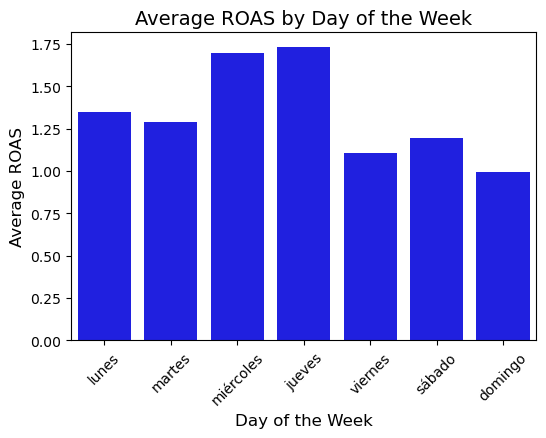

In [25]:
# Visualisation of average ROAS by day
plt.figure(figsize=(6, 4))
sns.barplot(data=roas_by_day, x='Dia_sem', y='ROAS_calculated', color='blue', errorbar=None)
plt.title('Average ROAS by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average ROAS', fontsize=12)
plt.xticks(rotation=45)
plt.show()

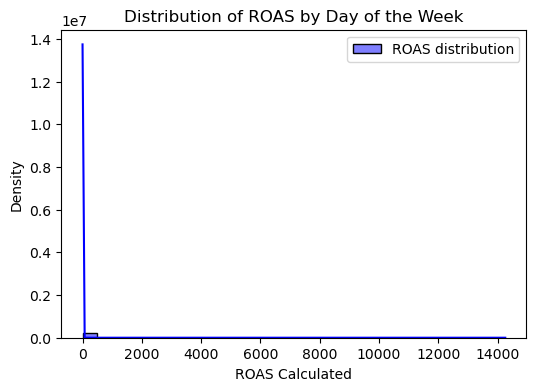

In [26]:
# Visualisation of ROAS distribution by Day of the Week
plt.figure(figsize=(6, 4))
sns.histplot(df['ROAS_calculated'], bins=30, kde=True, color='blue', label="ROAS distribution")
plt.title('Distribution of ROAS by Day of the Week')
plt.xlabel('ROAS Calculated')
plt.ylabel('Density')
plt.legend()
plt.show()

* *We can see that there are outliers that affect the visualisation and interpretation of the data, so we will proceed to filter and clean the outliers.*

In [27]:
# Filtering the dataset to remove outliers using percentiles (1% and 99%).
lower_percentile = df['ROAS_calculated'].quantile(0.01)
upper_percentile = df['ROAS_calculated'].quantile(0.99)

df_filtered_percentiles = df[(df['ROAS_calculated'] >= lower_percentile) & (df['ROAS_calculated'] <= upper_percentile)]

# Checking the number of records after filtering
df_filtered_percentiles.shape[0]

235034

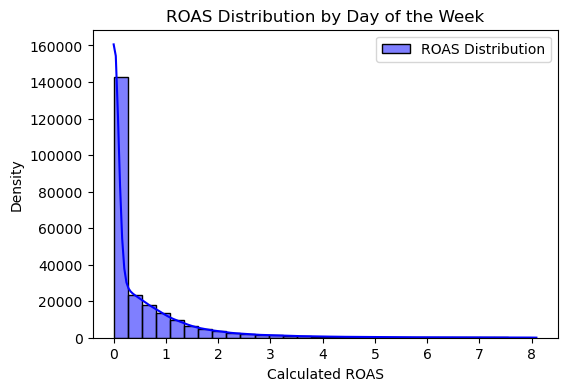

In [28]:
# Visualisation of ROAS distribution by Day of the Week
plt.figure(figsize=(6, 4))
sns.histplot(df_filtered_percentiles['ROAS_calculated'], bins=30, kde=True, color='blue', label="ROAS Distribution")
plt.title('ROAS Distribution by Day of the Week')
plt.xlabel('Calculated ROAS')
plt.ylabel('Density')
plt.legend()
plt.show()

### Anova Test to support hyphotesis and to determine statistical difference

In [29]:
# Group values by day
roas_values_by_day = [df[df['Dia_sem'] == day]['ROAS_calculated'] for day in day_order]

In [30]:
# Performing ANOVA test

anova_result = f_oneway(*roas_values_by_day)
print(f"ANOVA Result - F: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.4f}")

ANOVA Result - F: 2.00, p-value: 0.0621


In [31]:
# Interpretation of ANOVA

if anova_result.pvalue < 0.05:
    print("There are statistically significant differences in ROAS between the days of the week.")
else:
    print("No statistically significant differences in ROAS were found between the days of the week.")

No statistically significant differences in ROAS were found between the days of the week.


### Insight 2: What is the relationship between the final cost and the ROAS of a campaign? The more the campaign invests, the more ROAS it generates?.

In [32]:
df[['Coste_f', 'ROAS_calculated']].describe()

,Coste_f,ROAS_calculated
count,237409.000000,237409.000000
mean,4.467605,1.339685
std,5.395849,36.836913
min,0.000000,0.000000
25%,1.400296,0.000000
50%,2.808154,0.075214
75%,5.501542,0.713481
max,94.273730,14260.085983


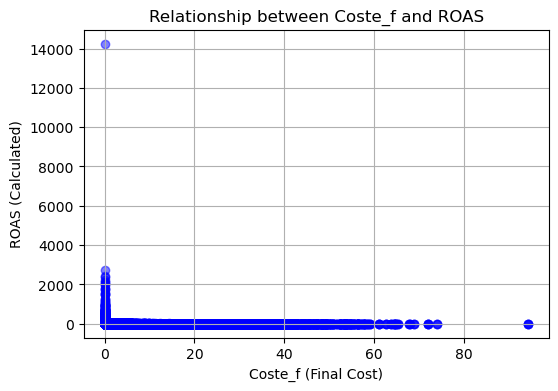

In [33]:
# Checking the relationship between Cost_f and ROAS

plt.figure(figsize=(6, 4))
plt.scatter(df['Coste_f'], df['ROAS_calculated'], alpha=0.5, color='blue')
plt.title('Relationship between Coste_f and ROAS')
plt.xlabel('Coste_f (Final Cost)')
plt.ylabel('ROAS (Calculated)')
plt.grid(True)
plt.show()

* *We use the previous variable df_filtered_percentiled which already has the outliers filtered out, because this will allow us to have a better view of the analysis.*

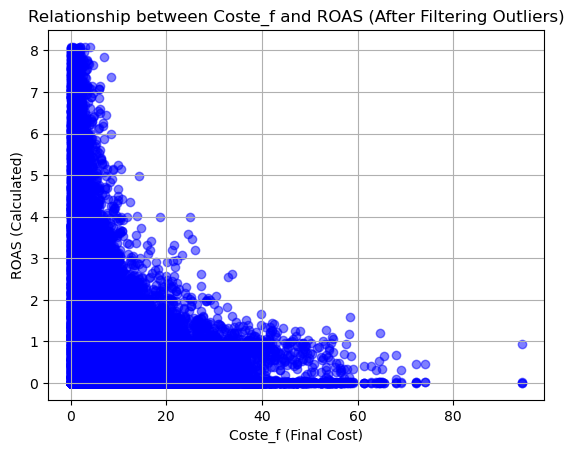

In [34]:
# Creating the scatterplot with the filtered dataset
plt.scatter(df_filtered_percentiles['Coste_f'], df_filtered_percentiles['ROAS_calculated'], alpha=0.5, color='blue')
plt.title('Relationship between Coste_f and ROAS (After Filtering Outliers)')
plt.xlabel('Coste_f (Final Cost)')
plt.ylabel('ROAS (Calculated)')
plt.grid(True)
plt.show()

To reinforce the above idea, let's calculate the correlation between Cost and ROAS.

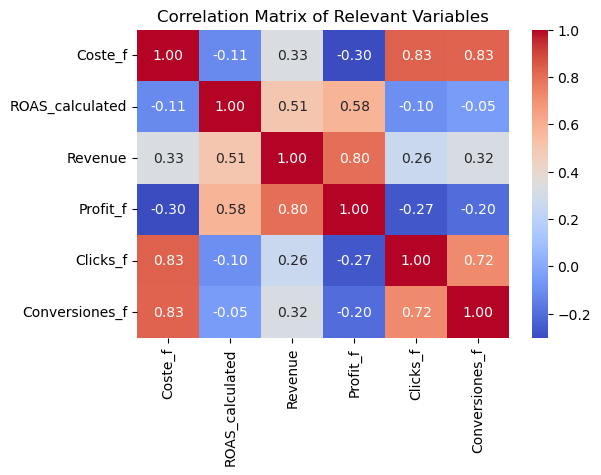

In [35]:
# Selecting the relevant variables for correlation
columns_of_interest = ['Coste_f', 'ROAS_calculated', 'Revenue', 'Profit_f', 'Clicks_f', 'Conversiones_f']
correlation_data = df_filtered_percentiles[columns_of_interest]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualising the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix of Relevant Variables')
plt.show()

### Insight 3: Which devices generate the most conversions and how does this impact overall campaign performance in terms of ROAS?

In [36]:
# Grouping data by 'Dispositivo_revenue' and calculating total conversions by device
conversions_by_device = df.groupby('Dispositivo_revenue')['Conversiones_f'].sum().reset_index()

conversions_by_device

,Dispositivo_revenue,Conversiones_f
0,Desktop,547021
1,Smart Phones,278433
2,Tablet,20519


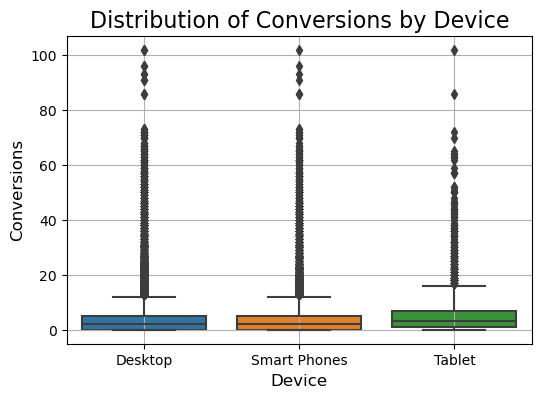

In [37]:
# Creating a boxplot to show the distribution of Conversions by Device
plt.figure(figsize=(6, 4))
sns.boxplot(x='Dispositivo_revenue', y='Conversiones_f', data=df_filtered_percentiles)

plt.title('Distribution of Conversions by Device', fontsize=16)
plt.xlabel('Device', fontsize=12)
plt.ylabel('Conversions', fontsize=12)

plt.grid(True)
plt.show()

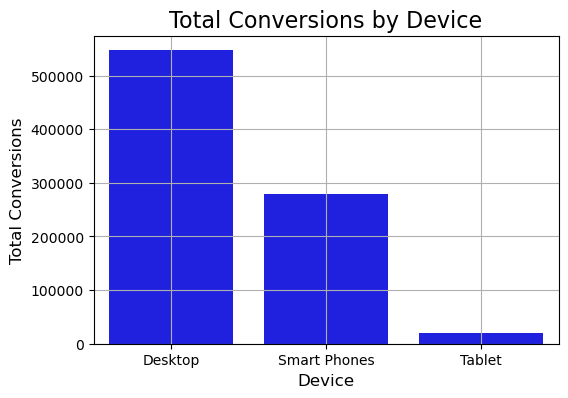

In [38]:
# Creating a bar chart to show conversions by device
plt.figure(figsize=(6, 4))
sns.barplot(x='Dispositivo_revenue', y='Conversiones_f', data=conversions_by_device, color='blue')
plt.title('Total Conversions by Device', fontsize=16)
plt.xlabel('Device', fontsize=12)
plt.ylabel('Total Conversions', fontsize=12)
plt.grid(True)
plt.show()

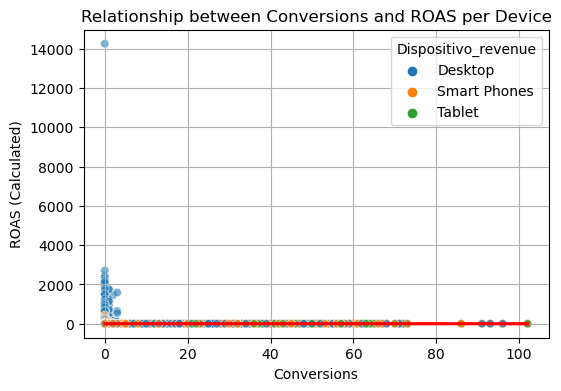

In [39]:
# Creating a scatter plot to look at the relationship between Conversions and ROAS per Device
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Conversiones_f', y='ROAS_calculated', hue='Dispositivo_revenue', data=df, alpha=0.6)

# Adding regression line
sns.regplot(x='Conversiones_f', y='ROAS_calculated', data=df_filtered_percentiles, scatter=False, color='red')

plt.title('Relationship between Conversions and ROAS per Device')
plt.xlabel('Conversions')
plt.ylabel('ROAS (Calculated)')
plt.grid(True)
plt.show()

We use the previous variable df_filtered_percentiled which already has the outliers filtered out, because this will allow us to have a better view of the analysis.

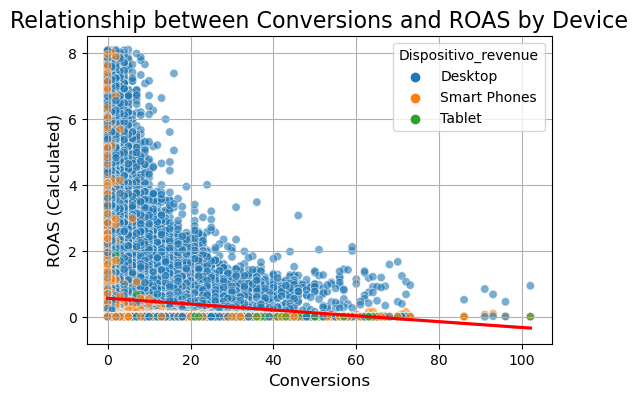

In [40]:
# Create a scatter plot to observe the relationship between Conversions and ROAS by Device
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Conversiones_f', y='ROAS_calculated', hue='Dispositivo_revenue', data=df_filtered_percentiles, alpha=0.6)

# Add regression line
sns.regplot(x='Conversiones_f', y='ROAS_calculated', data=df_filtered_percentiles, scatter=False, color='red')

plt.title('Relationship between Conversions and ROAS by Device', fontsize=16)
plt.xlabel('Conversions', fontsize=12)
plt.ylabel('ROAS (Calculated)', fontsize=12)
plt.grid(True)
plt.show()

## Insight 4: Are there categories that perform better in ROAS and Revenue in certain countries?

In [41]:
# Removing rows where the Country is ‘GBR’.
df_filtered_percentiles = df_filtered_percentiles[df_filtered_percentiles['Pais'] != 'GBR']

# Verify that it has been deleted correctly
df_filtered_percentiles['Pais'].value_counts()

Pais
USA    199427
CAN     33706
AUS      1900
Name: count, dtype: int64

In [42]:
df_filtered_percentiles["Pais"].value_counts()

Pais
USA    199427
CAN     33706
AUS      1900
Name: count, dtype: int64

In [43]:
# Counting how many countries have each category
category_country_counts = df.groupby('Categoria')['Pais'].nunique()
category_country_counts

Categoria
AccidentPersonalInjuryLaw      1
AccountingAuditing             1
AccountingFinancialSoftwar     1
AccountingFinancialSoftware    3
AccountingSofware              1
                              ..
VideoMeeting                   2
VideoOnDemand                  1
WebDesignDevelopment           2
WebStatsInternetAnalytics      1
Windows                        1
Name: Pais, Length: 160, dtype: int64

In [44]:
valid_categories = category_country_counts[category_country_counts >= 3].index
valid_categories.nunique()

12

In [45]:
# Filtering the DataFrame with only valid categories
df_filtered_categories = df_filtered_percentiles[df_filtered_percentiles['Categoria'].isin(valid_categories)]
df_filtered_categories.head()

,Fecha,Dia_sem,Dia,Mes,Año,Cuenta_id,Campaña_id,Grupo_id,Anuncio_id,Dispositivo_revenue,...,Conversiones_f,Conversiones_revenue,Conv_diff_i,Conv_diff_f,Conv_diff_i_%,Conv_diff_f _%,Vistas_video_i,Vistas_video_f,TQ_TypeTag,ROAS_calculated
26,2022-03-12,sábado,12,3,2022,5926673325,14860267353,131873933950,549948756870,Desktop,...,16,34,18,18.0,2.13,2.13,42,23,4.5,7.370831
51,2022-01-25,martes,25,1,2022,2137965400,15346107977,129625464906,563540780823,Desktop,...,5,9,4,4.0,1.80,1.80,38,25,2.5,7.849725
163,2021-12-14,martes,14,12,2021,8039128043,14860634835,133595502448,549963911502,Desktop,...,3,23,11,20.0,1.92,7.67,18,5,0.5,7.137018
174,2022-02-28,lunes,28,2,2022,8039128043,15983209412,138225019131,576358318230,Desktop,...,46,68,19,22.0,1.39,1.48,100,100,5.5,1.249656
188,2022-01-22,sábado,22,1,2022,2137965400,15346107977,129625464906,563540780823,Desktop,...,9,7,-3,-2.0,0.70,0.78,32,29,2.0,7.067297


In [46]:
# Grouping by country and category, adding up revenue
roas_by_country_category = df_filtered_categories.groupby(['Pais', 'Categoria'])['ROAS_calculated'].sum().reset_index()
roas_by_country_category.head()

,Pais,Categoria,ROAS_calculated
0,AUS,AttorneysLawFirms,12.643405
1,AUS,CarInsurance,12.223277
2,AUS,CollegesUniversitiesPostSecondaryEduc,4.301355
3,AUS,CustomerServiceSupportSoftware,40.517729
4,AUS,HostedDataStorage,25.864923


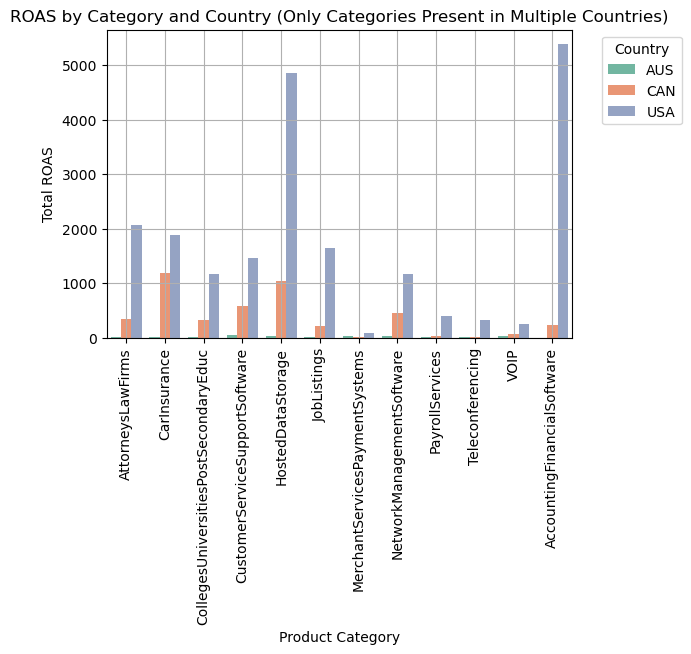

In [47]:
# Visualising revenue by country and category
plt.figure(figsize=(6, 4))
sns.barplot(x='Categoria', y='ROAS_calculated', hue='Pais', data=roas_by_country_category, palette='Set2')

plt.title('ROAS by Category and Country (Only Categories Present in Multiple Countries)')
plt.xlabel('Product Category')
plt.ylabel('Total ROAS')
plt.xticks(rotation=90)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [48]:
# Identifying the country with the highest ROAS for each category.a
toproas_countries_by_category = roas_by_country_category.loc[roas_by_country_category.groupby('Categoria')['ROAS_calculated'].idxmax()]
toproas_countries_by_category.head()

,Pais,Categoria,ROAS_calculated
23,USA,AccountingFinancialSoftware,5380.527191
24,USA,AttorneysLawFirms,2070.352167
25,USA,CarInsurance,1888.558400
26,USA,CollegesUniversitiesPostSecondaryEduc,1161.058420
27,USA,CustomerServiceSupportSoftware,1457.572117


In [49]:
# Grouping by country and category, adding up revenue
revenue_by_country_category = df_filtered_categories.groupby(['Pais', 'Categoria'])['Revenue'].sum().reset_index()
revenue_by_country_category.head()

,Pais,Categoria,Revenue
0,AUS,AttorneysLawFirms,16.064088
1,AUS,CarInsurance,15.874114
2,AUS,CollegesUniversitiesPostSecondaryEduc,6.932448
3,AUS,CustomerServiceSupportSoftware,41.772252
4,AUS,HostedDataStorage,32.140795


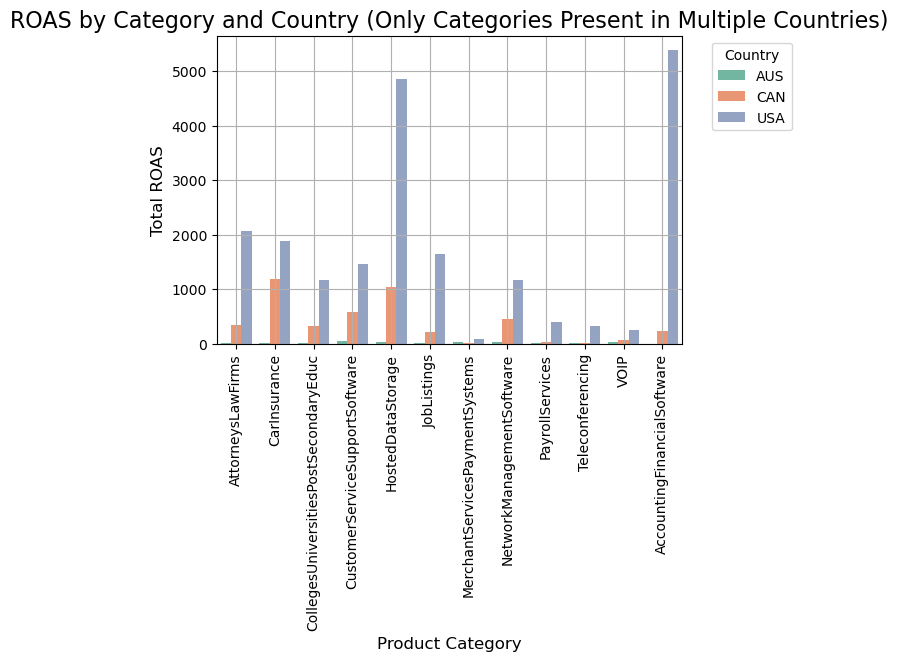

In [50]:
# Visualising revenue by country and category
plt.figure(figsize=(6, 4))
sns.barplot(x='Categoria', y='ROAS_calculated', hue='Pais', data=roas_by_country_category, palette='Set2')

plt.title('ROAS by Category and Country (Only Categories Present in Multiple Countries)', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total ROAS', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

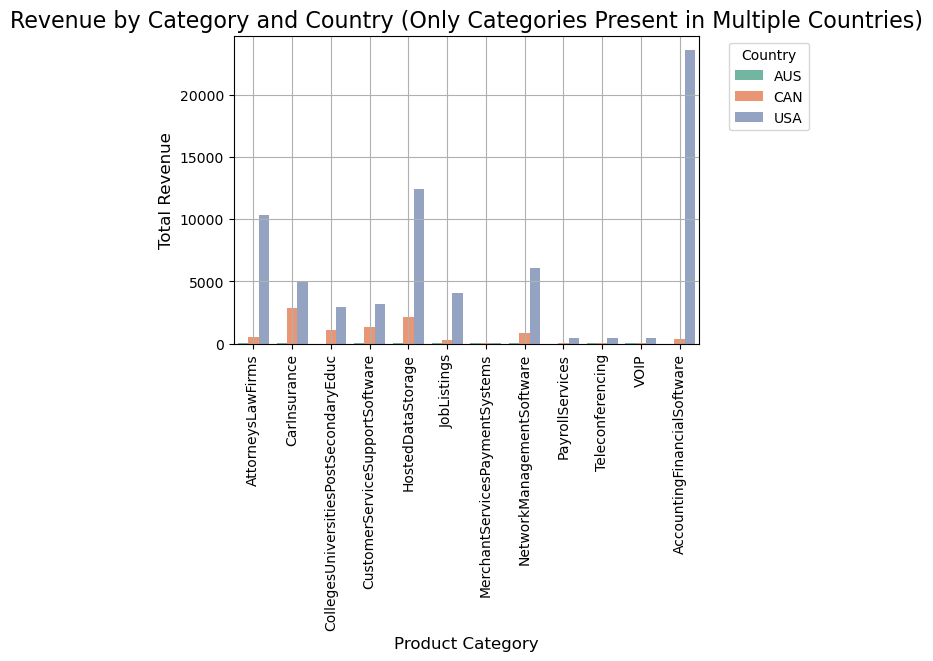

In [51]:
# Visualising revenue by country and category
plt.figure(figsize=(6, 4))
sns.barplot(x='Categoria', y='Revenue', hue='Pais', data=revenue_by_country_category, palette='Set2')

plt.title('Revenue by Category and Country (Only Categories Present in Multiple Countries)', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [52]:
# Identifying the country with the highest ROAS by category
toprevenue_countries_by_category = revenue_by_country_category.loc[revenue_by_country_category.groupby('Categoria')['Revenue'].idxmax()]
toprevenue_countries_by_category.head()

,Pais,Categoria,Revenue
23,USA,AccountingFinancialSoftware,23564.527228
24,USA,AttorneysLawFirms,10290.739751
25,USA,CarInsurance,5028.539512
26,USA,CollegesUniversitiesPostSecondaryEduc,2918.026960
27,USA,CustomerServiceSupportSoftware,3217.268589


In [53]:
# Grouping data by country and calculating average ROAS and average conversions
country_performance = df_filtered_percentiles.groupby('Pais')[['ROAS_calculated', 'Conversiones_f']].mean().reset_index()

country_performance

,Pais,ROAS_calculated,Conversiones_f
0,AUS,0.220493,0.426316
1,CAN,0.370171,2.752833
2,USA,0.557584,3.766516
